<a href="datacamp.com/workspacecompetition" target="_blank">![banner](banner.png)</a>

# Loan Data

Ready to put your coding skills to the test? Join us for our Workspace Competition.  
For more information, visit [datacamp.com/workspacecompetition](https://datacamp.com/workspacecompetition) 

## Context
This dataset ([source](https://www.kaggle.com/itssuru/loan-data)) consists of data from almost 10,000 borrowers that took loans - with some paid back and others still in progress. It was extracted from lendingclub.com which is an organization that connects borrowers with investors. We've included a few suggested questions at the end of this template to help you get started.

In [1]:
# Load packages
import numpy as np 
import pandas as pd 

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#to create Pmf and Cdf
!pip install empiricaldist 
from empiricaldist import Pmf
from empiricaldist import Cdf

#To use linear regression between variables
from scipy.stats import linregress

  Created wheel for empiricaldist: filename=empiricaldist-0.6.2-py3-none-any.whl size=10733 sha256=671f44025f355739173ac71e4bf98f86a39ed7efdbf75cf842ffebe46715200c
  Stored in directory: /root/.cache/pip/wheels/34/22/5f/9ba9db604d08670e283b2e04551dd407f44cf889fdb9617ce5
Successfully built empiricaldist


## Load your data

In [2]:
#For Kaggle usage only
import os
#Print out the file paths
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-data-analysis-datacamp-workspace/loan_data.csv
/kaggle/input/loan-data-analysis-datacamp-workspace/variable_explanation.csv


In [3]:
#Loading file from Kaggle
df = pd.read_csv('/kaggle/input/loan-data-analysis-datacamp-workspace/loan_data.csv', index_col=None)

# Load data from the csv file
# df = pd.read_csv('loan_data.csv', index_col=None)

# Change the dots in the column names to underscores
df.columns = [c.replace(".", "_") for c in df.columns]
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of rows/records: 9578
Number of columns/variables: 14


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Understand your variables

In [4]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
#Loading file from Kaggle
var_dict = pd.read_csv('/kaggle/input/loan-data-analysis-datacamp-workspace/variable_explanation.csv', index_col=0) 

# Join with the variables dataframe
# var_dict = pd.read_csv('variable_explanation.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Values,Explanation
Variable,,,
credit_policy,2,"[1, 0]",1 if the customer meets the credit underwritin...
purpose,7,"[debt_consolidation, credit_card, all_other, h...",The purpose of the loan.
int_rate,249,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",The interest rate of the loan (more risky borr...
installment,4788,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",The monthly installments owed by the borrower ...
log_annual_inc,1987,"[11.35040654, 11.08214255, 10.37349118, 11.299...",The natural log of the self-reported annual in...
dti,2529,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",The debt-to-income ratio of the borrower (amou...
fico,44,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ...",The FICO credit score of the borrower.
days_with_cr_line,2687,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",The number of days the borrower has had a cred...
revol_bal,7869,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",The borrower's revolving balance (amount unpai...


Now you can start to explore this dataset with the chance to win incredible prices! Can't think of where to start? Try your hand at these suggestions:

- Extract useful insights and visualize them in the most interesting way possible.
- Find out how long it takes for users to pay back their loan.
- Build a model that can predict the probability a user will be able to pay back their loan within a certain period.
- Find out what kind of people take a loan for what purposes.

In [5]:
#See the full descriptions of each of the variable
#Iterator for var_dict's values to be used in printing
var_description = (item for item in var_dict.values)
for i in range(len(variables['Variable'])):
    print(variables['Variable'][i],':', next(var_description))

credit_policy : ['1 if the customer meets the credit underwriting criteria; 0 otherwise.']
purpose : ['The purpose of the loan.']
int_rate : ['The interest rate of the loan (more risky borrowers are assigned higher interest rates).']
installment : ['The monthly installments owed by the borrower if the loan is funded.']
log_annual_inc : ['The natural log of the self-reported annual income of the borrower.']
dti : ['The debt-to-income ratio of the borrower (amount of debt divided by annual income).']
fico : ['The FICO credit score of the borrower.']
days_with_cr_line : ['The number of days the borrower has had a credit line.']
revol_bal : ["The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle)."]
revol_util : ["The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available)."]
inq_last_6mths : ["The borrower's number of inquiries by creditors in the last 6 months."]
delinq_2yrs : ['The number of

### Judging Criteria
| CATEGORY | WEIGHTAGE | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Analysis** | 30%       | <ul><li>Documentation on the goal and what was included in the analysis</li><li>How the question was approached</li><li>Visualisation tools and techniques utilized</li></ul>       |
| **Results**  | 30%       | <ul><li>How the results derived related to the problem chosen</li><li>The ability to trigger potential further analysis</li></ul> |
| **Creativity** | 40% | <ul><li>How "out of the box" the analysis conducted is</li><li>Whether the publication is properly motivated and adds value</li></ul> |

Descriptive statistics below to understand more about each variable

In [6]:
#See the important stats of each variable in the dataset
df.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
#Check the variable types and whether there're any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


As we can see, there's no missing data in the dataset above, which will make the job of filling missing
values easier. 

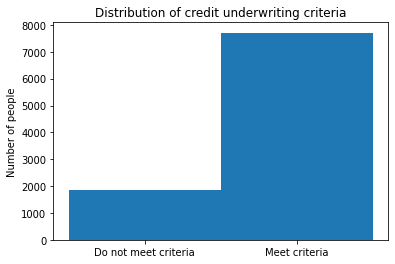

In [8]:
#See the distribution of people who qualify for credit underwriting criteria
fig , ax = plt.subplots()
plt.hist(x = df['credit_policy'], bins = 2)
plt.title("Distribution of credit underwriting criteria")
plt.ylabel('Number of people')
ax.set_xticks((0.25, 0.75))
ax.set_xticklabels(['Do not meet criteria','Meet criteria'])
plt.show()

We can see that **there're almost 4 times the number of people** who meet underwriting criteria compared to those who don't.

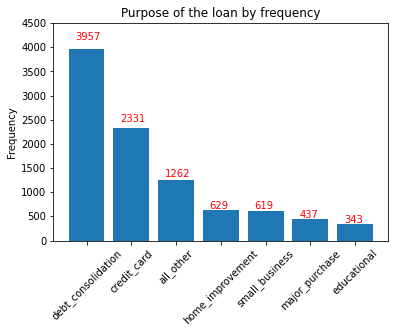

In [9]:
fig,ax = plt.subplots()
plt.bar(x = df['purpose'].unique(), height = df['purpose'].value_counts()) #default will sort from highest
plt.title("Purpose of the loan by frequency")
plt.ylabel('Frequency')
ax.set_ylim(0, 4500)
# Add the values on top of the x axis
values = df['purpose'].value_counts()
for hor, ver in enumerate(values):
    #hor is horizontal coordinate, ver is vertical coordinate
    ax.text(hor - 0.25, ver+ver*0.05, s = str(ver), color = 'red')
plt.xticks(x = df['purpose'].unique(), rotation=45) #Rotate X ticks by 45 degrees
plt.yticks()
plt.show()

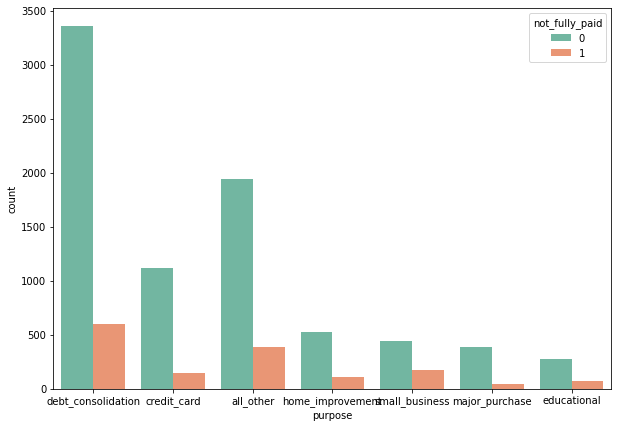

In [10]:
#We'll visualize this with seaborn to see which category has the most number of people who have not paid back their loan
plt.figure(figsize = (10, 7))
sns.countplot(x = 'purpose', hue ='not_fully_paid', data=df, palette = 'Set2')
plt.show()

Debt consolidation category has the highest number of unpaid loans, at over 500 people. 

Next we'll see the percentage of people who are most likely to not pay back based on their FICO score. We'll use the image below as guideline to divide into different categories.
1. 300 - 560: very bad
2. 560 - 650: bad
3. 650 - 700: fair
4. 700 - 750: good
5. 750 - 850: excellent 
![](https://d187qskirji7ti.cloudfront.net/news/wp-content/uploads/2014/04/Credit-Score-Factors.jpg)

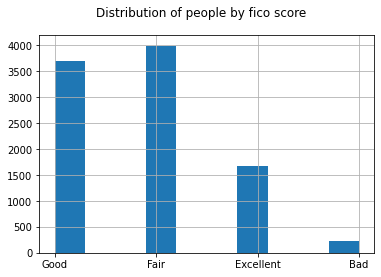

Fair         3990
Good         3687
Excellent    1670
Bad           231
Very bad        0
Name: fico, dtype: int64


In [11]:
plt.suptitle('Distribution of people by fico score')
pd.cut(df['fico'], bins = [300,560,650,700,750,850],
        labels =['Very bad','Bad','Fair','Good','Excellent']).hist()
plt.show()
df_fico = pd.cut(df['fico'], bins = [300,560,650,700,750,850],
        labels =['Very bad','Bad','Fair','Good','Excellent'])
print(df_fico.value_counts())

We can see that there're no people with "very bad" credit scores. There're over 5200 people, or more than 50% of dataset with scores of good or excellent. 

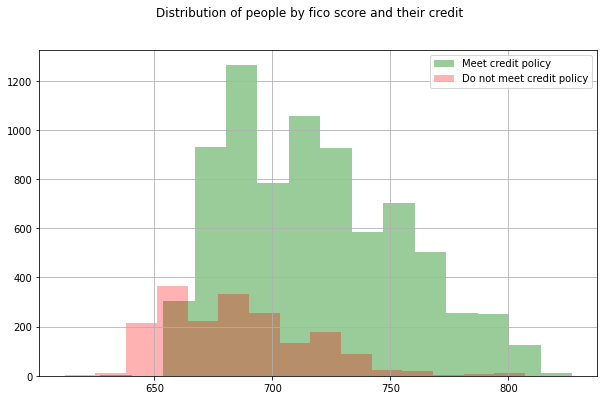

Number of people with good (700) or above credit score but do not meet credit policy is: 549


In [12]:
#Alternative way to visualize this with credit policy variable
plt.figure(figsize = (10,6))
plt.suptitle('Distribution of people by fico score and their credit')
df[df['credit_policy'] == 1]['fico'].hist(bins = 15,alpha = 0.4, color = 'green',
                                          label ='Meet credit policy')
df[df['credit_policy'] == 0]['fico'].hist(bins = 15,alpha = 0.3, color = 'red',
                                          label ='Do not meet credit policy')
plt.legend()
plt.show()
print("Number of people with good (700) or above credit score but do not meet credit policy is: " + 
      str(df[(df['credit_policy']==0) & (df['fico']>=700)]['credit_policy'].count()))

According to graph above, it's surprising to see that there's quite some number of people who do not meet underwriting credit criteria, but have "good" or even "excellent" scores. Next we'll look at the relationship between these variables: interest rate, credit policy, not_fully_paid, and fico score.

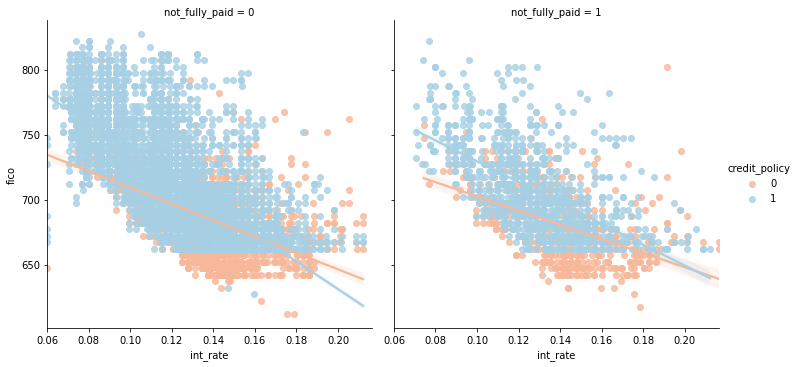

In [13]:
sns.lmplot(x = 'int_rate', y = 'fico', hue = 'credit_policy', col ='not_fully_paid', data=df, palette = 'RdBu')
plt.show()

People who meet credit policy tend to have lower interest rate and have higher fico score. In both plots, int_rate and fico score have negative linear relationship as indicated by the lines. 

LinregressResult(slope=-20.825127728201096, intercept=714.5047151170082, rvalue=-0.1392222227576963, pvalue=4.1498864099328595e-36, stderr=1.65165685201014, intercept_stderr=0.4322476079799651)
LinregressResult(slope=-18.564866369710458, intercept=699.5238625517022, rvalue=-0.16095043912966228, pvalue=2.3276223660800518e-10, stderr=2.9094621621382752, intercept_stderr=0.8917084500453969)


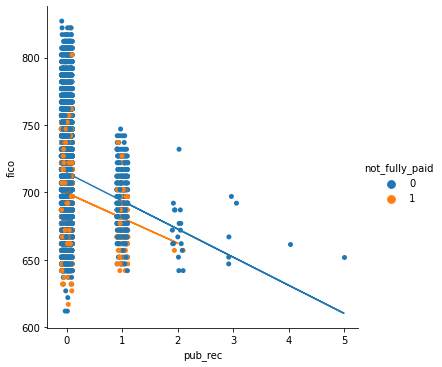

In [14]:
df_nfp_0 = df[df['not_fully_paid'] == 0]
df_nfp_1 = df[df['not_fully_paid'] == 1]
pub_rec_fico0 = linregress(df_nfp_0['pub_rec'], df_nfp_0['fico'])
pub_rec_fico1 = linregress(df_nfp_1['pub_rec'], df_nfp_1['fico'])
print(pub_rec_fico0)
print(pub_rec_fico1)
fx_pub_rec_0 = df_nfp_0['pub_rec']
fx_pub_rec_1 = df_nfp_1['pub_rec']
fy_fico_0 = pub_rec_fico0.intercept + fx_pub_rec_0 * pub_rec_fico0.slope
fy_fico_1 = pub_rec_fico1.intercept + fx_pub_rec_1 * pub_rec_fico1.slope
sns.catplot(x = 'pub_rec', y = 'fico', hue = 'not_fully_paid', data=df)
plt.plot(fx_pub_rec_0, fy_fico_0, '-')
plt.plot(fx_pub_rec_1, fy_fico_1, '-')
plt.show()

There's a strong correlation between having 0 public record and having fully paid. Also, if people have a public record or more, then it's very likely that their FICO score will be below 750. We also see that for every public record the person has, he/she will get -20 or -18 points deducted from their FICO score, depending on whether they have paid their loan in full. People who have not paid yet only have bad public records up to 2 times. 

In [15]:
df.groupby(['pub_rec'])['not_fully_paid'].describe()

,count,mean,std,min,25%,50%,75%,max
pub_rec,,,,,,,,
0,9019.0,0.154673,0.361613,0.0,0.0,0.0,0.0,1.0
1,533.0,0.255159,0.436360,0.0,0.0,0.0,1.0,1.0
2,19.0,0.105263,0.315302,0.0,0.0,0.0,0.0,1.0
3,5.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
5,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


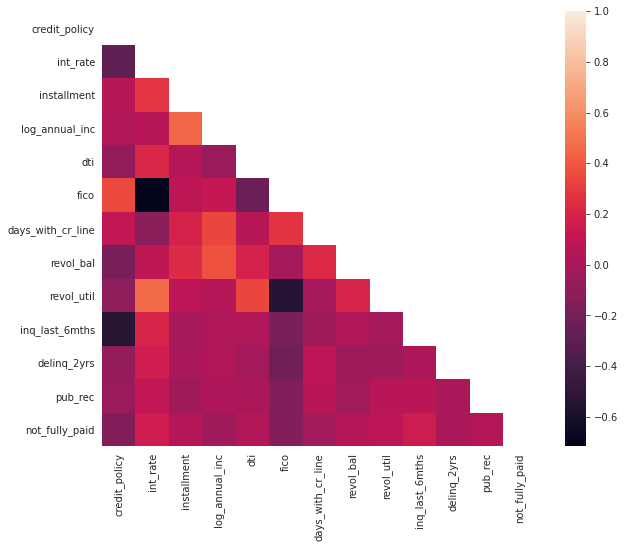

In [16]:
# Create correlation matrix and graph it
corr = df.corr()
#To cover half away the correlation matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize = (10,8))
    ax = sns.heatmap(corr, mask = mask, vmax = 1, square = True)
plt.show()

From the correlation matrix, we can infer a few things: 
- There's a strong negative correlation between fico score and interest rate, that is they move in opposite direction. This makes sense because if someone has poor credit score, their interest will be higher and vice versa. We'll graph this below.
- There's a strong negative correlation between number of inquiry in the past 6 months and credit policy. As people make more credit inquiries, they'll be less likely to meet underwriting credit criteria. 
- Strong negative correlation between revolving utility (the amount of credit used over the total credit line available) and fico. For people who overspends their credit limit, this will have negative impact on their fico score. 
- Moderate positive correlation between natural log of annual income & installment. As people earn more money annually, they will also have a bigger monthly payment (installment) since they have more disposable income to spend. 
- Interest rate & revolving utility has moderate positive correlation. As people utilizes more of their available credit line, the interest rate for them will go up.
- Dti (debt-to-income ratio) and revolving utility has mild positive correlation. As people own more debt, it also means that they're utilizing more of their own available credit line. 
- Log annual income has mild positive correlation with days with credit line (how long they have had a credit line). 

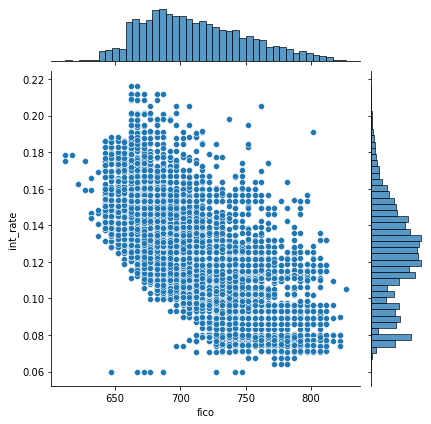

In [17]:
sns.jointplot(x ='fico', y = 'int_rate', data =df)
plt.show()

From the graph on top, we can see that interest rate will drop as fico score gets better.

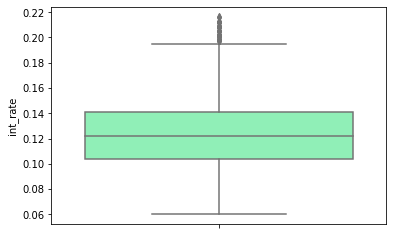

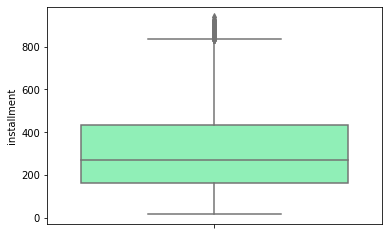

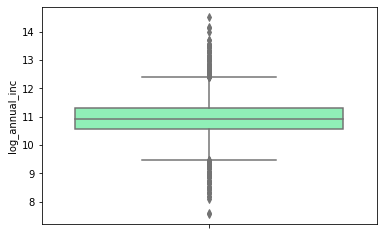

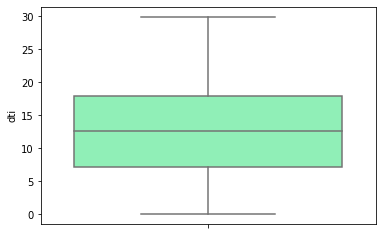

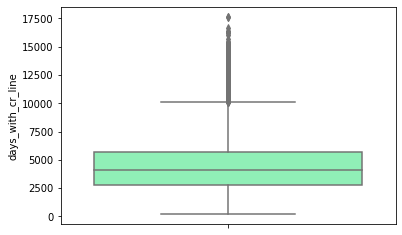

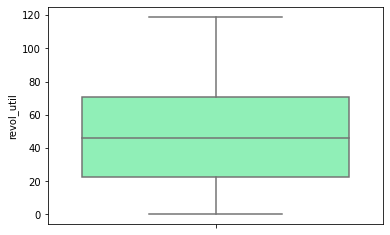

In [18]:
#Select continous variables (float)
cont_var = [c for c in df.columns if df[c].dtype == 'float']

#Graph continuous variables to see the distribution
for i in cont_var:
    sns.boxplot(y = i, palette = 'rainbow', data = df)
    plt.show()

Next we'll answer the question of when the loan will be paid off assuming that a monthly installment is being made. We'll create a new column for this. Then we'll use pivot table to see what types of loans will take the longest to pay off. 

In [19]:
df['time_to_paid_off_mths'] = df['revol_bal']/df['installment']
pd.pivot_table(index = 'purpose', values = 'time_to_paid_off_mths', aggfunc = 'mean', margins = True, 
               margins_name = 'Average across all purposes', data = df)

,time_to_paid_off_mths
purpose,
all_other,72.470874
credit_card,90.090695
debt_consolidation,56.338013
educational,71.684185
home_improvement,95.372521
major_purchase,42.882616
small_business,68.357813
Average across all purposes,67.987446


Home improvement seems to take the longest to pay off, at 95 months on average. The category "major_purchase" has the shortest paid off time at 42 months.

In [20]:
pd.pivot_table(index = 'purpose', values = ['log_annual_inc', 'dti', 'delinq_2yrs'], 
               aggfunc = {'log_annual_inc':np.mean,'dti':np.mean,
                           'delinq_2yrs': 'count'             }, data = df)

,delinq_2yrs,dti,log_annual_inc
purpose,,,
all_other,2331,11.079498,10.845313
credit_card,1262,14.099398,11.047230
debt_consolidation,3957,14.076462,10.912909
educational,343,11.344927,10.549956
home_improvement,629,10.197504,11.201979
major_purchase,437,10.159886,10.844895
small_business,619,10.793296,11.146216


There's not much income variation across different purposes, but we can see that groups with the most number of delinquencies in the past 2 years are "debt consolidation" and "all other". Debt-to-income ratio is also high in the debt consolidation and credit card groups.

Since income is a log variable, we'll use a special KDE plot to see its distribution.

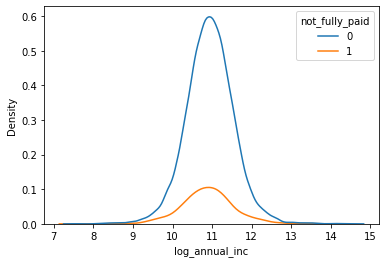

In [21]:
sns.kdeplot(df['log_annual_inc'], hue = df['not_fully_paid'])
plt.show()

It has a perfect normal distribution with mean at around 11. There're more people who have fully paid than people who have not fully paid. 

We'll turn some variables into PMF functions to be able to more easily visualize them. Let's begin with delinq_2yrs

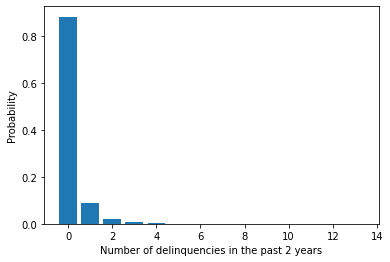

In [22]:
pmf_delinq = Pmf.from_seq(df['delinq_2yrs'], normalize = True)
pmf_delinq.bar()
plt.xlabel('Number of delinquencies in the past 2 years')
plt.ylabel('Probability')
plt.show()

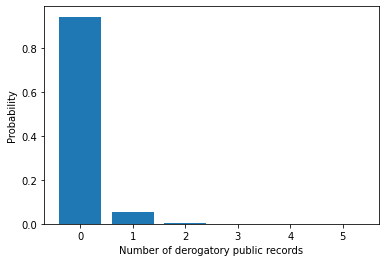

In [23]:
pmf_pubrec = Pmf.from_seq(df['pub_rec'], normalize = True)
pmf_pubrec.bar()
plt.xlabel('Number of derogatory public records')
plt.ylabel('Probability')
plt.show()

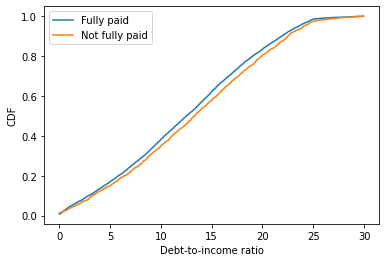

In [24]:
dti_0 = df[df['not_fully_paid'] == 0]['dti']
dti_1 = df[df['not_fully_paid'] == 1]['dti']  
cdf_dti_0 = Cdf.from_seq(dti_0, normalize = True)
cdf_dti_1 = Cdf.from_seq(dti_1, normalize = True)
cdf_dti_0.plot(label = "Fully paid")
cdf_dti_1.plot(label = "Not fully paid")
plt.legend()
plt.xlabel('Debt-to-income ratio')
plt.ylabel('CDF')
plt.show()

# **Preprocessing**

Next we'll go into the preprocessing aspect for the variables. First we'll import the necessary libraries. 

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [26]:
#Use dummy encoding for purpose
df_dummy = pd.get_dummies(df['purpose'], prefix = 'purpose', drop_first = True) #to avoid multicollinearity
#Merging dataframes to get the dummy variables
df = df.merge(df_dummy, left_index = True, right_index = True)

In [27]:
#Separate 'not_fully_paid' into the target for prediction
y = df['not_fully_paid']
#Drop the target and old categorical 'purpose' from dataframe
X = df
X.drop('purpose', axis='columns',inplace = True)
X.drop('not_fully_paid', axis = 'columns', inplace = True)

In [28]:
#Cont var will be standardized
cont_var = [c for c in df.columns if df[c].dtype == 'float']
cont_var.remove('log_annual_inc')
cont_var_exc_inc = cont_var

int_var = [c for c in df.columns if df[c].dtype == 'int']
int_var.remove('credit_policy')
int_var_exc_credit_policy = int_var

#Standardize the integer variables to improve accuracy except for log_annual_inc
standardizeX = StandardScaler()

# Initialize column transformer
columnTrans = ColumnTransformer(transformers = [
    ('cont',standardizeX,cont_var_exc_inc),
    ],remainder='passthrough')

# **Model Building**

First we'll use logistic regression to predict whether a person has fully paid yet or not. 

In [29]:
# #No tuning 
# best_params = {'penalty': 'none',
#  'tol': 6.270966851983718e-05,
#  'C': 5.66186934498108,
#  'solver': 'lbfgs',
#  'max_iter': 303,
#  'multi_class': 'ovr',
#  'l1_ratio': 0.5370655987720873}
# model1 = LogisticRegression(random_state = 0,**best_params)
# #to hold results
# accuracy = []
# #Establish stratified Kfold with 10 splits
# skf = StratifiedKFold(n_splits = 10, shuffle = False)

# for fold, (train_index,test_index) in enumerate(skf.split(X, y)):
# #         penalty='l2', dual=False, tol=0.0001, C=1.0, 
# #                             fit_intercept=True, intercept_scaling=1, class_weight=None, 
# #                             solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, 
# #                             warm_start=False, n_jobs=None, l1_ratio=None
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     #Standardize the continuous variables
#     X_train = columnTrans.fit_transform(X_train)
#     X_test = columnTrans.transform(X_test)

#     #Fiting the model
#     model1.fit(X_train, y_train)

#     #Make prediction
#     preds = model1.predict(X_test)

#     #Scoring the model
#     score = model1.score(X_test, y_test)
#     accuracy.append(score)
#     print(f'Accuracy score for {fold}th is: {score}')

# print(f'The average score across all 10 folds is {np.mean(accuracy)}')

Hyperparameter tuning with Optuna

In [30]:
#With Optuna for tuning
accuracy = []
def run(trial):
    penalty = trial.suggest_categorical('penalty',['l1', 'l2', 'elasticnet', 'none'])
    tol = trial.suggest_float('tol', 0.0000001, 0.0001, log = True)
    C = trial.suggest_float('C', 1.0, 100)
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    max_iter = trial.suggest_int('max_iter', 100, 10000)
    multi_class = trial.suggest_categorical('multi_class',["auto", "ovr", "multinomial"])
    l1_ratio = trial.suggest_float('l1_ratio', 0, 1)

    #Standardize the continuous variables
    # Using regular train_test split to work with Optuna
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    X_train = columnTrans.fit_transform(X_train)
    X_test = columnTrans.transform(X_test)
    model1 = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, solver='lbfgs', 
                                max_iter=100, multi_class='auto', verbose=0, 
                            warm_start=False, n_jobs=-1, l1_ratio=None, random_state = 0)
    #Fiting the model
    model1.fit(X_train, y_train)

    #Make prediction
    preds = model1.predict(X_test)

    #Scoring the model
    score = model1.score(X_test, y_test)
    accuracy.append(score)
    print(f'Accuracy score is: {score}')
    return score

In [31]:
study = optuna.create_study(direction = 'maximize')
study.optimize(run, n_trials = 200)

[I 2021-09-01 17:02:38,916] A new study created in memory with name: no-name-19b33af5-056c-4a26-b635-ba235cb889c5
[I 2021-09-01 17:02:40,414] Trial 0 finished with value: 0.8434237995824635 and parameters: {'penalty': 'elasticnet', 'tol': 9.424643295249435e-05, 'C': 55.47046120468677, 'solver': 'liblinear', 'max_iter': 8976, 'multi_class': 'ovr', 'l1_ratio': 0.1622930580720734}. Best is trial 0 with value: 0.8434237995824635.


Accuracy score is: 0.8434237995824635


[I 2021-09-01 17:02:41,434] Trial 1 finished with value: 0.8366388308977035 and parameters: {'penalty': 'none', 'tol': 6.704796627389697e-05, 'C': 45.36694028667517, 'solver': 'saga', 'max_iter': 7422, 'multi_class': 'ovr', 'l1_ratio': 0.21870570135817458}. Best is trial 0 with value: 0.8434237995824635.


Accuracy score is: 0.8366388308977035


[I 2021-09-01 17:02:42,480] Trial 2 finished with value: 0.8324634655532359 and parameters: {'penalty': 'none', 'tol': 6.19532579166639e-05, 'C': 56.66342498632294, 'solver': 'liblinear', 'max_iter': 6796, 'multi_class': 'ovr', 'l1_ratio': 0.2540756461666148}. Best is trial 0 with value: 0.8434237995824635.


Accuracy score is: 0.8324634655532359


[I 2021-09-01 17:02:43,614] Trial 3 finished with value: 0.8319415448851775 and parameters: {'penalty': 'elasticnet', 'tol': 9.550114096869924e-07, 'C': 8.355596899257156, 'solver': 'lbfgs', 'max_iter': 2579, 'multi_class': 'auto', 'l1_ratio': 0.45812345133448296}. Best is trial 0 with value: 0.8434237995824635.


Accuracy score is: 0.8319415448851775


[I 2021-09-01 17:02:44,203] Trial 4 finished with value: 0.8350730688935282 and parameters: {'penalty': 'none', 'tol': 3.602214076904469e-05, 'C': 77.54677590389448, 'solver': 'sag', 'max_iter': 5777, 'multi_class': 'multinomial', 'l1_ratio': 0.7673051606965877}. Best is trial 0 with value: 0.8434237995824635.


Accuracy score is: 0.8350730688935282


[I 2021-09-01 17:02:44,803] Trial 5 finished with value: 0.8298538622129437 and parameters: {'penalty': 'none', 'tol': 9.6747426428418e-06, 'C': 46.169185171439814, 'solver': 'newton-cg', 'max_iter': 8999, 'multi_class': 'multinomial', 'l1_ratio': 0.4235089684864187}. Best is trial 0 with value: 0.8434237995824635.


Accuracy score is: 0.8298538622129437


[I 2021-09-01 17:02:45,439] Trial 6 finished with value: 0.8366388308977035 and parameters: {'penalty': 'l2', 'tol': 1.9058438917374755e-05, 'C': 15.629712919633878, 'solver': 'liblinear', 'max_iter': 9410, 'multi_class': 'multinomial', 'l1_ratio': 0.8644867486964367}. Best is trial 0 with value: 0.8434237995824635.


Accuracy score is: 0.8366388308977035


[I 2021-09-01 17:02:46,035] Trial 7 finished with value: 0.8355949895615866 and parameters: {'penalty': 'elasticnet', 'tol': 8.153264048540332e-07, 'C': 20.219185422360855, 'solver': 'newton-cg', 'max_iter': 1112, 'multi_class': 'multinomial', 'l1_ratio': 0.9609632123597421}. Best is trial 0 with value: 0.8434237995824635.


Accuracy score is: 0.8355949895615866


[I 2021-09-01 17:02:46,635] Trial 8 finished with value: 0.837160751565762 and parameters: {'penalty': 'l1', 'tol': 2.0618467664302473e-06, 'C': 27.631618956031456, 'solver': 'lbfgs', 'max_iter': 1463, 'multi_class': 'auto', 'l1_ratio': 0.1493808288403119}. Best is trial 0 with value: 0.8434237995824635.


Accuracy score is: 0.837160751565762


[I 2021-09-01 17:02:47,272] Trial 9 finished with value: 0.8272442588726514 and parameters: {'penalty': 'l1', 'tol': 1.270329087533436e-06, 'C': 92.76956301618348, 'solver': 'sag', 'max_iter': 6455, 'multi_class': 'auto', 'l1_ratio': 0.9529299858793879}. Best is trial 0 with value: 0.8434237995824635.


Accuracy score is: 0.8272442588726514


[I 2021-09-01 17:02:47,945] Trial 10 finished with value: 0.8408141962421712 and parameters: {'penalty': 'elasticnet', 'tol': 2.9124149092056304e-07, 'C': 64.825282726527, 'solver': 'liblinear', 'max_iter': 3707, 'multi_class': 'ovr', 'l1_ratio': 0.0244715517087242}. Best is trial 0 with value: 0.8434237995824635.


Accuracy score is: 0.8408141962421712


[I 2021-09-01 17:02:48,561] Trial 11 finished with value: 0.8423799582463466 and parameters: {'penalty': 'elasticnet', 'tol': 1.6602983872574856e-07, 'C': 71.32603539636457, 'solver': 'liblinear', 'max_iter': 3796, 'multi_class': 'ovr', 'l1_ratio': 0.0013336781312532214}. Best is trial 0 with value: 0.8434237995824635.


Accuracy score is: 0.8423799582463466


[I 2021-09-01 17:02:49,209] Trial 12 finished with value: 0.8470772442588727 and parameters: {'penalty': 'elasticnet', 'tol': 1.272263966252892e-07, 'C': 79.53984415715549, 'solver': 'liblinear', 'max_iter': 4548, 'multi_class': 'ovr', 'l1_ratio': 0.011846685120495387}. Best is trial 12 with value: 0.8470772442588727.


Accuracy score is: 0.8470772442588727


[I 2021-09-01 17:02:49,828] Trial 13 finished with value: 0.8397703549060542 and parameters: {'penalty': 'elasticnet', 'tol': 5.292590754716446e-06, 'C': 94.7721477418737, 'solver': 'liblinear', 'max_iter': 4570, 'multi_class': 'ovr', 'l1_ratio': 0.020121145926028136}. Best is trial 12 with value: 0.8470772442588727.


Accuracy score is: 0.8397703549060542


[I 2021-09-01 17:02:50,472] Trial 14 finished with value: 0.8397703549060542 and parameters: {'penalty': 'elasticnet', 'tol': 1.2683202141533297e-07, 'C': 83.04835585853313, 'solver': 'saga', 'max_iter': 7882, 'multi_class': 'ovr', 'l1_ratio': 0.3655799108197863}. Best is trial 12 with value: 0.8470772442588727.


Accuracy score is: 0.8397703549060542


[I 2021-09-01 17:02:51,120] Trial 15 finished with value: 0.8455114822546973 and parameters: {'penalty': 'l2', 'tol': 5.092572700559453e-06, 'C': 33.558293104204765, 'solver': 'liblinear', 'max_iter': 5051, 'multi_class': 'ovr', 'l1_ratio': 0.6191140651524709}. Best is trial 12 with value: 0.8470772442588727.


Accuracy score is: 0.8455114822546973


[I 2021-09-01 17:02:51,767] Trial 16 finished with value: 0.855427974947808 and parameters: {'penalty': 'l2', 'tol': 4.9084257071935695e-06, 'C': 34.57800308259358, 'solver': 'liblinear', 'max_iter': 5104, 'multi_class': 'ovr', 'l1_ratio': 0.6119221332417412}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.855427974947808


[I 2021-09-01 17:02:52,417] Trial 17 finished with value: 0.8392484342379958 and parameters: {'penalty': 'l2', 'tol': 3.4324576854040147e-07, 'C': 40.82593751147206, 'solver': 'liblinear', 'max_iter': 2626, 'multi_class': 'ovr', 'l1_ratio': 0.6364349332069676}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8392484342379958


[I 2021-09-01 17:02:53,080] Trial 18 finished with value: 0.8455114822546973 and parameters: {'penalty': 'l2', 'tol': 1.1489160924205711e-05, 'C': 62.70269519789235, 'solver': 'liblinear', 'max_iter': 5531, 'multi_class': 'ovr', 'l1_ratio': 0.5687862964897814}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8455114822546973


[I 2021-09-01 17:02:53,745] Trial 19 finished with value: 0.8397703549060542 and parameters: {'penalty': 'l2', 'tol': 2.7318170130486553e-06, 'C': 2.268485851176841, 'solver': 'sag', 'max_iter': 4115, 'multi_class': 'ovr', 'l1_ratio': 0.7313532437875045}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8397703549060542


[I 2021-09-01 17:02:54,367] Trial 20 finished with value: 0.8376826722338204 and parameters: {'penalty': 'l1', 'tol': 5.051745706969162e-07, 'C': 35.290912910276965, 'solver': 'lbfgs', 'max_iter': 211, 'multi_class': 'auto', 'l1_ratio': 0.3236823096852225}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8376826722338204


[I 2021-09-01 17:02:55,024] Trial 21 finished with value: 0.8538622129436325 and parameters: {'penalty': 'l2', 'tol': 1.3786182229514925e-05, 'C': 64.16264844863903, 'solver': 'liblinear', 'max_iter': 5578, 'multi_class': 'ovr', 'l1_ratio': 0.5668005362833204}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8538622129436325


[I 2021-09-01 17:02:55,674] Trial 22 finished with value: 0.8418580375782881 and parameters: {'penalty': 'l2', 'tol': 2.220045735447701e-05, 'C': 82.24789358325428, 'solver': 'liblinear', 'max_iter': 6162, 'multi_class': 'ovr', 'l1_ratio': 0.5480643133044591}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8418580375782881


[I 2021-09-01 17:02:56,291] Trial 23 finished with value: 0.8481210855949896 and parameters: {'penalty': 'l2', 'tol': 9.058994392413401e-06, 'C': 69.76002992697936, 'solver': 'liblinear', 'max_iter': 3043, 'multi_class': 'ovr', 'l1_ratio': 0.7067222495946903}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8481210855949896


[I 2021-09-01 17:02:56,955] Trial 24 finished with value: 0.843945720250522 and parameters: {'penalty': 'l2', 'tol': 6.2926012633078725e-06, 'C': 68.2834025516836, 'solver': 'newton-cg', 'max_iter': 2556, 'multi_class': 'ovr', 'l1_ratio': 0.7053173521178271}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.843945720250522


[I 2021-09-01 17:02:57,578] Trial 25 finished with value: 0.8397703549060542 and parameters: {'penalty': 'l2', 'tol': 1.395109805076873e-05, 'C': 54.69621513157033, 'solver': 'saga', 'max_iter': 3111, 'multi_class': 'ovr', 'l1_ratio': 0.8234397683078672}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8397703549060542


[I 2021-09-01 17:02:58,231] Trial 26 finished with value: 0.8413361169102297 and parameters: {'penalty': 'l2', 'tol': 3.30935353510555e-05, 'C': 59.836252157076785, 'solver': 'liblinear', 'max_iter': 5222, 'multi_class': 'ovr', 'l1_ratio': 0.6693134794494894}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8413361169102297


[I 2021-09-01 17:02:58,930] Trial 27 finished with value: 0.8517745302713987 and parameters: {'penalty': 'l2', 'tol': 4.174634563573802e-06, 'C': 71.37249418936902, 'solver': 'liblinear', 'max_iter': 1460, 'multi_class': 'ovr', 'l1_ratio': 0.5152241923276633}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8517745302713987


[I 2021-09-01 17:02:59,556] Trial 28 finished with value: 0.8324634655532359 and parameters: {'penalty': 'l2', 'tol': 3.6553059621926278e-06, 'C': 50.03250379716084, 'solver': 'liblinear', 'max_iter': 7226, 'multi_class': 'ovr', 'l1_ratio': 0.5085138219044987}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8324634655532359


[I 2021-09-01 17:03:00,172] Trial 29 finished with value: 0.843945720250522 and parameters: {'penalty': 'l2', 'tol': 2.3145915766870777e-06, 'C': 87.07399721253144, 'solver': 'liblinear', 'max_iter': 1773, 'multi_class': 'ovr', 'l1_ratio': 0.4424032425102527}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.843945720250522


[I 2021-09-01 17:03:00,868] Trial 30 finished with value: 0.8496868475991649 and parameters: {'penalty': 'l2', 'tol': 6.803479283367157e-06, 'C': 99.71534236099521, 'solver': 'liblinear', 'max_iter': 8192, 'multi_class': 'ovr', 'l1_ratio': 0.5715675776592404}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8496868475991649


[I 2021-09-01 17:03:01,496] Trial 31 finished with value: 0.8418580375782881 and parameters: {'penalty': 'l2', 'tol': 7.244964424702288e-06, 'C': 99.92426043663488, 'solver': 'liblinear', 'max_iter': 8335, 'multi_class': 'ovr', 'l1_ratio': 0.562892358034355}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8418580375782881


[I 2021-09-01 17:03:02,151] Trial 32 finished with value: 0.8418580375782881 and parameters: {'penalty': 'l2', 'tol': 4.243527350195813e-06, 'C': 40.984710383115676, 'solver': 'liblinear', 'max_iter': 8391, 'multi_class': 'ovr', 'l1_ratio': 0.6107040658065581}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8418580375782881


[I 2021-09-01 17:03:02,818] Trial 33 finished with value: 0.8324634655532359 and parameters: {'penalty': 'l2', 'tol': 1.8569619578777886e-06, 'C': 73.52392226425485, 'solver': 'liblinear', 'max_iter': 7035, 'multi_class': 'ovr', 'l1_ratio': 0.49316044293485073}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8324634655532359


[I 2021-09-01 17:03:03,468] Trial 34 finished with value: 0.8392484342379958 and parameters: {'penalty': 'l2', 'tol': 1.5001564234898193e-05, 'C': 55.22471437358145, 'solver': 'saga', 'max_iter': 6091, 'multi_class': 'ovr', 'l1_ratio': 0.3737117708452825}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8392484342379958


[I 2021-09-01 17:03:04,127] Trial 35 finished with value: 0.8303757828810021 and parameters: {'penalty': 'l2', 'tol': 6.86716592664589e-05, 'C': 22.807151179594413, 'solver': 'liblinear', 'max_iter': 9741, 'multi_class': 'ovr', 'l1_ratio': 0.5401175263497606}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8303757828810021


[I 2021-09-01 17:03:04,774] Trial 36 finished with value: 0.8496868475991649 and parameters: {'penalty': 'none', 'tol': 2.6970500358439748e-05, 'C': 51.211262762328865, 'solver': 'lbfgs', 'max_iter': 4557, 'multi_class': 'ovr', 'l1_ratio': 0.7731977555764867}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8496868475991649


[I 2021-09-01 17:03:05,467] Trial 37 finished with value: 0.837160751565762 and parameters: {'penalty': 'none', 'tol': 3.500821628243175e-05, 'C': 51.98640028053297, 'solver': 'lbfgs', 'max_iter': 4626, 'multi_class': 'multinomial', 'l1_ratio': 0.8508480693549202}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.837160751565762


[I 2021-09-01 17:03:06,120] Trial 38 finished with value: 0.8361169102296451 and parameters: {'penalty': 'l2', 'tol': 8.615480219323499e-06, 'C': 44.04907359661502, 'solver': 'sag', 'max_iter': 127, 'multi_class': 'auto', 'l1_ratio': 0.4685822328572071}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8361169102296451


[I 2021-09-01 17:03:06,779] Trial 39 finished with value: 0.837160751565762 and parameters: {'penalty': 'none', 'tol': 2.0015531818684553e-05, 'C': 59.08874634541363, 'solver': 'lbfgs', 'max_iter': 5805, 'multi_class': 'multinomial', 'l1_ratio': 0.7874282653756209}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.837160751565762


[I 2021-09-01 17:03:07,393] Trial 40 finished with value: 0.8413361169102297 and parameters: {'penalty': 'none', 'tol': 9.564417245464751e-05, 'C': 48.860794012107725, 'solver': 'lbfgs', 'max_iter': 6663, 'multi_class': 'ovr', 'l1_ratio': 0.761002230063702}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8413361169102297


[I 2021-09-01 17:03:08,046] Trial 41 finished with value: 0.8455114822546973 and parameters: {'penalty': 'none', 'tol': 4.9081440975773034e-05, 'C': 36.906732516313085, 'solver': 'lbfgs', 'max_iter': 7579, 'multi_class': 'ovr', 'l1_ratio': 0.9124227541116924}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8455114822546973


[I 2021-09-01 17:03:08,687] Trial 42 finished with value: 0.842901878914405 and parameters: {'penalty': 'none', 'tol': 2.641158379690451e-05, 'C': 30.68513495406998, 'solver': 'newton-cg', 'max_iter': 1092, 'multi_class': 'ovr', 'l1_ratio': 0.6513538407664601}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.842901878914405


[I 2021-09-01 17:03:09,308] Trial 43 finished with value: 0.8382045929018789 and parameters: {'penalty': 'l1', 'tol': 1.4590775780839745e-06, 'C': 65.46200078895606, 'solver': 'lbfgs', 'max_iter': 8791, 'multi_class': 'ovr', 'l1_ratio': 0.5908732758909465}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8382045929018789


[I 2021-09-01 17:03:09,984] Trial 44 finished with value: 0.848643006263048 and parameters: {'penalty': 'none', 'tol': 3.368097165531297e-06, 'C': 10.056450278613308, 'solver': 'liblinear', 'max_iter': 4111, 'multi_class': 'ovr', 'l1_ratio': 0.3960025069574293}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.848643006263048


[I 2021-09-01 17:03:10,641] Trial 45 finished with value: 0.8350730688935282 and parameters: {'penalty': 'l2', 'tol': 1.316233076429279e-05, 'C': 24.531525501610965, 'solver': 'liblinear', 'max_iter': 5411, 'multi_class': 'ovr', 'l1_ratio': 0.5057256000506924}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8350730688935282


[I 2021-09-01 17:03:11,281] Trial 46 finished with value: 0.842901878914405 and parameters: {'penalty': 'l2', 'tol': 6.783701493449119e-06, 'C': 87.82833956852616, 'solver': 'liblinear', 'max_iter': 1958, 'multi_class': 'auto', 'l1_ratio': 0.2837630414342227}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.842901878914405


[I 2021-09-01 17:03:11,941] Trial 47 finished with value: 0.843945720250522 and parameters: {'penalty': 'none', 'tol': 4.870252441954896e-06, 'C': 74.65305733848574, 'solver': 'newton-cg', 'max_iter': 3537, 'multi_class': 'multinomial', 'l1_ratio': 0.41403235301283803}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.843945720250522


[I 2021-09-01 17:03:12,594] Trial 48 finished with value: 0.8256784968684759 and parameters: {'penalty': 'l1', 'tol': 1.0430192970680752e-05, 'C': 47.35207587783651, 'solver': 'sag', 'max_iter': 789, 'multi_class': 'ovr', 'l1_ratio': 0.6871698614041455}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8256784968684759


[I 2021-09-01 17:03:13,252] Trial 49 finished with value: 0.8408141962421712 and parameters: {'penalty': 'l2', 'tol': 5.216401036828674e-05, 'C': 62.143277001889366, 'solver': 'liblinear', 'max_iter': 4868, 'multi_class': 'ovr', 'l1_ratio': 0.5955268849500868}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8408141962421712


[I 2021-09-01 17:03:13,902] Trial 50 finished with value: 0.8361169102296451 and parameters: {'penalty': 'l2', 'tol': 1.6878097073628968e-05, 'C': 97.57020206838143, 'solver': 'lbfgs', 'max_iter': 9975, 'multi_class': 'ovr', 'l1_ratio': 0.5254839088772685}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8361169102296451


[I 2021-09-01 17:03:14,555] Trial 51 finished with value: 0.8413361169102297 and parameters: {'penalty': 'none', 'tol': 3.6847194930609846e-06, 'C': 2.0428069913643156, 'solver': 'liblinear', 'max_iter': 4131, 'multi_class': 'ovr', 'l1_ratio': 0.39299495871998175}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8413361169102297


[I 2021-09-01 17:03:15,241] Trial 52 finished with value: 0.8345511482254697 and parameters: {'penalty': 'none', 'tol': 2.6211964954007547e-06, 'C': 12.354768035315482, 'solver': 'liblinear', 'max_iter': 4139, 'multi_class': 'ovr', 'l1_ratio': 0.1763613132119039}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8345511482254697


[I 2021-09-01 17:03:15,859] Trial 53 finished with value: 0.8444676409185804 and parameters: {'penalty': 'none', 'tol': 3.27809802033446e-06, 'C': 12.689365082691282, 'solver': 'liblinear', 'max_iter': 5793, 'multi_class': 'ovr', 'l1_ratio': 0.46717790690719235}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8444676409185804


[I 2021-09-01 17:03:16,515] Trial 54 finished with value: 0.8491649269311065 and parameters: {'penalty': 'none', 'tol': 6.300457475964609e-06, 'C': 18.923767979778873, 'solver': 'liblinear', 'max_iter': 3347, 'multi_class': 'ovr', 'l1_ratio': 0.34154832438562677}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8491649269311065


[I 2021-09-01 17:03:17,143] Trial 55 finished with value: 0.8460334029227558 and parameters: {'penalty': 'none', 'tol': 7.619666298863296e-06, 'C': 20.27481623322437, 'solver': 'liblinear', 'max_iter': 3229, 'multi_class': 'ovr', 'l1_ratio': 0.3329895744084375}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8460334029227558


[I 2021-09-01 17:03:17,826] Trial 56 finished with value: 0.8502087682672234 and parameters: {'penalty': 'elasticnet', 'tol': 5.885686737705887e-06, 'C': 39.554190261363715, 'solver': 'saga', 'max_iter': 2244, 'multi_class': 'ovr', 'l1_ratio': 0.08761092901593781}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8502087682672234


[I 2021-09-01 17:03:18,484] Trial 57 finished with value: 0.8418580375782881 and parameters: {'penalty': 'elasticnet', 'tol': 2.4605171413351137e-05, 'C': 39.701727431649, 'solver': 'saga', 'max_iter': 2140, 'multi_class': 'ovr', 'l1_ratio': 0.10234426514314118}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8418580375782881


[I 2021-09-01 17:03:19,141] Trial 58 finished with value: 0.8449895615866388 and parameters: {'penalty': 'elasticnet', 'tol': 5.266772147846772e-06, 'C': 29.417859862807507, 'solver': 'saga', 'max_iter': 2493, 'multi_class': 'auto', 'l1_ratio': 0.7376404560889096}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8449895615866388


[I 2021-09-01 17:03:19,805] Trial 59 finished with value: 0.8455114822546973 and parameters: {'penalty': 'elasticnet', 'tol': 1.0131191003468559e-06, 'C': 42.454215059980726, 'solver': 'saga', 'max_iter': 1329, 'multi_class': 'ovr', 'l1_ratio': 0.643692209048018}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8455114822546973


[I 2021-09-01 17:03:20,555] Trial 60 finished with value: 0.837160751565762 and parameters: {'penalty': 'elasticnet', 'tol': 9.79466610078375e-06, 'C': 52.962090377735876, 'solver': 'saga', 'max_iter': 6657, 'multi_class': 'ovr', 'l1_ratio': 0.5777069428221446}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.837160751565762


[I 2021-09-01 17:03:21,222] Trial 61 finished with value: 0.8329853862212944 and parameters: {'penalty': 'elasticnet', 'tol': 5.782192489941767e-06, 'C': 32.55090425279576, 'solver': 'liblinear', 'max_iter': 558, 'multi_class': 'ovr', 'l1_ratio': 0.10999201297752001}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8329853862212944


[I 2021-09-01 17:03:21,853] Trial 62 finished with value: 0.8345511482254697 and parameters: {'penalty': 'l2', 'tol': 1.2868363963306802e-05, 'C': 26.26832474885673, 'solver': 'liblinear', 'max_iter': 2788, 'multi_class': 'ovr', 'l1_ratio': 0.19919793620390439}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8345511482254697


[I 2021-09-01 17:03:22,481] Trial 63 finished with value: 0.8460334029227558 and parameters: {'penalty': 'l2', 'tol': 1.8411146714907362e-06, 'C': 44.91139658112789, 'solver': 'saga', 'max_iter': 3485, 'multi_class': 'ovr', 'l1_ratio': 0.2584903473853657}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8460334029227558


[I 2021-09-01 17:03:23,146] Trial 64 finished with value: 0.8335073068893528 and parameters: {'penalty': 'l2', 'tol': 4.139188759507041e-06, 'C': 37.86899164676247, 'solver': 'liblinear', 'max_iter': 2208, 'multi_class': 'ovr', 'l1_ratio': 0.4473240160855863}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8335073068893528


[I 2021-09-01 17:03:23,804] Trial 65 finished with value: 0.8262004175365344 and parameters: {'penalty': 'elasticnet', 'tol': 8.138079882488083e-06, 'C': 18.024017481624046, 'solver': 'liblinear', 'max_iter': 1658, 'multi_class': 'ovr', 'l1_ratio': 0.9131432515291266}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8262004175365344


[I 2021-09-01 17:03:24,434] Trial 66 finished with value: 0.8355949895615866 and parameters: {'penalty': 'l2', 'tol': 6.331546935469265e-06, 'C': 66.6031207353106, 'solver': 'liblinear', 'max_iter': 5010, 'multi_class': 'ovr', 'l1_ratio': 0.6168441776317466}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8355949895615866


[I 2021-09-01 17:03:25,096] Trial 67 finished with value: 0.843945720250522 and parameters: {'penalty': 'l1', 'tol': 1.1109988027294684e-05, 'C': 33.8159288003313, 'solver': 'sag', 'max_iter': 4494, 'multi_class': 'ovr', 'l1_ratio': 0.9952052937838175}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.843945720250522


[I 2021-09-01 17:03:25,748] Trial 68 finished with value: 0.8460334029227558 and parameters: {'penalty': 'none', 'tol': 1.7114931871250357e-05, 'C': 57.75343911504192, 'solver': 'lbfgs', 'max_iter': 3028, 'multi_class': 'multinomial', 'l1_ratio': 0.5461886113079923}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8460334029227558


[I 2021-09-01 17:03:26,371] Trial 69 finished with value: 0.8272442588726514 and parameters: {'penalty': 'l2', 'tol': 2.7428013267370586e-06, 'C': 80.00524863220242, 'solver': 'liblinear', 'max_iter': 3840, 'multi_class': 'ovr', 'l1_ratio': 0.8007224136281005}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8272442588726514


[I 2021-09-01 17:03:26,998] Trial 70 finished with value: 0.8335073068893528 and parameters: {'penalty': 'l2', 'tol': 2.949466022750718e-05, 'C': 46.54684521295815, 'solver': 'saga', 'max_iter': 6085, 'multi_class': 'ovr', 'l1_ratio': 0.06131099420537889}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8335073068893528


[I 2021-09-01 17:03:27,687] Trial 71 finished with value: 0.8418580375782881 and parameters: {'penalty': 'none', 'tol': 4.823652239314782e-06, 'C': 8.397428043201163, 'solver': 'liblinear', 'max_iter': 4596, 'multi_class': 'ovr', 'l1_ratio': 0.47968176757103553}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8418580375782881


[I 2021-09-01 17:03:28,345] Trial 72 finished with value: 0.8366388308977035 and parameters: {'penalty': 'none', 'tol': 3.3606540232319295e-06, 'C': 15.748125040014006, 'solver': 'liblinear', 'max_iter': 3952, 'multi_class': 'ovr', 'l1_ratio': 0.3335528637797808}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8366388308977035


[I 2021-09-01 17:03:29,000] Trial 73 finished with value: 0.8392484342379958 and parameters: {'penalty': 'none', 'tol': 3.951795137234762e-06, 'C': 7.607364805101273, 'solver': 'liblinear', 'max_iter': 5326, 'multi_class': 'ovr', 'l1_ratio': 0.40894634033617705}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8392484342379958


[I 2021-09-01 17:03:29,653] Trial 74 finished with value: 0.8335073068893528 and parameters: {'penalty': 'none', 'tol': 2.2619393778586414e-06, 'C': 4.095558186821873, 'solver': 'liblinear', 'max_iter': 4388, 'multi_class': 'ovr', 'l1_ratio': 0.4328046286611938}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8335073068893528


[I 2021-09-01 17:03:30,308] Trial 75 finished with value: 0.8517745302713987 and parameters: {'penalty': 'none', 'tol': 2.9056498274969434e-06, 'C': 61.224772847079834, 'solver': 'liblinear', 'max_iter': 4893, 'multi_class': 'ovr', 'l1_ratio': 0.5232078045329902}. Best is trial 16 with value: 0.855427974947808.


Accuracy score is: 0.8517745302713987


[I 2021-09-01 17:03:30,961] Trial 76 finished with value: 0.8575156576200418 and parameters: {'penalty': 'none', 'tol': 1.554649622768083e-06, 'C': 63.038204055359735, 'solver': 'newton-cg', 'max_iter': 2323, 'multi_class': 'ovr', 'l1_ratio': 0.515582403312702}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8575156576200418


[I 2021-09-01 17:03:31,587] Trial 77 finished with value: 0.8319415448851775 and parameters: {'penalty': 'l2', 'tol': 1.7029867805892132e-06, 'C': 61.5360487565218, 'solver': 'newton-cg', 'max_iter': 5576, 'multi_class': 'ovr', 'l1_ratio': 0.5305275944437222}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8319415448851775


[I 2021-09-01 17:03:32,209] Trial 78 finished with value: 0.842901878914405 and parameters: {'penalty': 'l2', 'tol': 8.12827362604361e-07, 'C': 71.33526482585326, 'solver': 'newton-cg', 'max_iter': 1445, 'multi_class': 'ovr', 'l1_ratio': 0.5067885532448759}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.842901878914405


[I 2021-09-01 17:03:32,851] Trial 79 finished with value: 0.8329853862212944 and parameters: {'penalty': 'none', 'tol': 1.2273384039170474e-06, 'C': 56.33049736937389, 'solver': 'newton-cg', 'max_iter': 4834, 'multi_class': 'auto', 'l1_ratio': 0.6690269558178272}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8329853862212944


[I 2021-09-01 17:03:33,505] Trial 80 finished with value: 0.8444676409185804 and parameters: {'penalty': 'elasticnet', 'tol': 2.703571207760736e-06, 'C': 63.29668259081765, 'solver': 'newton-cg', 'max_iter': 1009, 'multi_class': 'ovr', 'l1_ratio': 0.5741936436876494}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8444676409185804


[I 2021-09-01 17:03:34,131] Trial 81 finished with value: 0.8288100208768268 and parameters: {'penalty': 'none', 'tol': 4.557706507694122e-06, 'C': 52.121671054044945, 'solver': 'liblinear', 'max_iter': 2376, 'multi_class': 'ovr', 'l1_ratio': 0.552603683353956}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8288100208768268


[I 2021-09-01 17:03:34,785] Trial 82 finished with value: 0.8350730688935282 and parameters: {'penalty': 'none', 'tol': 6.044039196569235e-06, 'C': 59.27556851950195, 'solver': 'lbfgs', 'max_iter': 1802, 'multi_class': 'ovr', 'l1_ratio': 0.6141481894820252}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8350730688935282


[I 2021-09-01 17:03:35,441] Trial 83 finished with value: 0.8382045929018789 and parameters: {'penalty': 'none', 'tol': 4.263923374530994e-05, 'C': 76.32068677119591, 'solver': 'newton-cg', 'max_iter': 2794, 'multi_class': 'ovr', 'l1_ratio': 0.4883889315445348}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8382045929018789


[I 2021-09-01 17:03:36,069] Trial 84 finished with value: 0.8423799582463466 and parameters: {'penalty': 'none', 'tol': 8.966729983575823e-06, 'C': 49.86784240805221, 'solver': 'liblinear', 'max_iter': 3319, 'multi_class': 'ovr', 'l1_ratio': 0.5270985856167121}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8423799582463466


[I 2021-09-01 17:03:36,723] Trial 85 finished with value: 0.8277661795407099 and parameters: {'penalty': 'none', 'tol': 7.091778712562796e-06, 'C': 68.54328261991739, 'solver': 'liblinear', 'max_iter': 5163, 'multi_class': 'ovr', 'l1_ratio': 0.592526483876648}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8277661795407099


[I 2021-09-01 17:03:37,379] Trial 86 finished with value: 0.8387265135699373 and parameters: {'penalty': 'l2', 'tol': 6.37967846260344e-07, 'C': 54.79126444550055, 'solver': 'liblinear', 'max_iter': 2101, 'multi_class': 'ovr', 'l1_ratio': 0.710327795351857}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8387265135699373


[I 2021-09-01 17:03:38,002] Trial 87 finished with value: 0.8465553235908142 and parameters: {'penalty': 'none', 'tol': 2.0618708635771185e-05, 'C': 65.932796522346, 'solver': 'lbfgs', 'max_iter': 6369, 'multi_class': 'ovr', 'l1_ratio': 0.4557072366747914}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8465553235908142


[I 2021-09-01 17:03:38,629] Trial 88 finished with value: 0.8355949895615866 and parameters: {'penalty': 'l2', 'tol': 2.1357715975342264e-06, 'C': 88.47748129025915, 'solver': 'liblinear', 'max_iter': 2861, 'multi_class': 'multinomial', 'l1_ratio': 0.6291890425751361}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8355949895615866


[I 2021-09-01 17:03:39,259] Trial 89 finished with value: 0.8387265135699373 and parameters: {'penalty': 'l1', 'tol': 2.9630820437280907e-06, 'C': 63.05327056554355, 'solver': 'sag', 'max_iter': 3599, 'multi_class': 'ovr', 'l1_ratio': 0.6681207499613943}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8387265135699373


[I 2021-09-01 17:03:39,879] Trial 90 finished with value: 0.8355949895615866 and parameters: {'penalty': 'none', 'tol': 5.5842541416234455e-06, 'C': 60.73154215493837, 'solver': 'saga', 'max_iter': 4800, 'multi_class': 'ovr', 'l1_ratio': 0.5184320115720911}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8355949895615866


[I 2021-09-01 17:03:40,583] Trial 91 finished with value: 0.8402922755741128 and parameters: {'penalty': 'none', 'tol': 1.5204223690173492e-06, 'C': 70.02997158904134, 'solver': 'liblinear', 'max_iter': 4109, 'multi_class': 'ovr', 'l1_ratio': 0.3796250523329506}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8402922755741128


[I 2021-09-01 17:03:41,241] Trial 92 finished with value: 0.8387265135699373 and parameters: {'penalty': 'none', 'tol': 3.4220639469243324e-06, 'C': 43.07446363909871, 'solver': 'liblinear', 'max_iter': 4337, 'multi_class': 'ovr', 'l1_ratio': 0.35134720471199493}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8387265135699373


[I 2021-09-01 17:03:41,904] Trial 93 finished with value: 0.8444676409185804 and parameters: {'penalty': 'none', 'tol': 4.347909662014838e-06, 'C': 57.36755314734254, 'solver': 'liblinear', 'max_iter': 5573, 'multi_class': 'ovr', 'l1_ratio': 0.48830723949804217}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8444676409185804


[I 2021-09-01 17:03:42,563] Trial 94 finished with value: 0.837160751565762 and parameters: {'penalty': 'none', 'tol': 2.390173117101696e-06, 'C': 22.654205467328595, 'solver': 'liblinear', 'max_iter': 9112, 'multi_class': 'ovr', 'l1_ratio': 0.2870345416329358}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.837160751565762


[I 2021-09-01 17:03:43,292] Trial 95 finished with value: 0.842901878914405 and parameters: {'penalty': 'l2', 'tol': 6.966106552842079e-06, 'C': 73.647565572224, 'solver': 'liblinear', 'max_iter': 3335, 'multi_class': 'ovr', 'l1_ratio': 0.5566145161600364}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.842901878914405


[I 2021-09-01 17:03:43,919] Trial 96 finished with value: 0.8340292275574113 and parameters: {'penalty': 'none', 'tol': 1.557737364334558e-05, 'C': 10.427887280854137, 'solver': 'liblinear', 'max_iter': 3867, 'multi_class': 'ovr', 'l1_ratio': 0.4346067065449455}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8340292275574113


[I 2021-09-01 17:03:44,577] Trial 97 finished with value: 0.8496868475991649 and parameters: {'penalty': 'elasticnet', 'tol': 1.104795630249688e-05, 'C': 5.005774857707932, 'solver': 'newton-cg', 'max_iter': 7865, 'multi_class': 'ovr', 'l1_ratio': 0.592440897302795}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8496868475991649


[I 2021-09-01 17:03:45,237] Trial 98 finished with value: 0.8397703549060542 and parameters: {'penalty': 'elasticnet', 'tol': 1.1680858769908899e-05, 'C': 35.863890069561364, 'solver': 'newton-cg', 'max_iter': 7954, 'multi_class': 'ovr', 'l1_ratio': 0.5936039614298163}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8397703549060542


[I 2021-09-01 17:03:45,905] Trial 99 finished with value: 0.8329853862212944 and parameters: {'penalty': 'elasticnet', 'tol': 7.806072073272981e-05, 'C': 48.168519167300545, 'solver': 'newton-cg', 'max_iter': 8491, 'multi_class': 'ovr', 'l1_ratio': 0.5670729358541511}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8329853862212944


[I 2021-09-01 17:03:46,599] Trial 100 finished with value: 0.8455114822546973 and parameters: {'penalty': 'elasticnet', 'tol': 9.41252225992439e-06, 'C': 38.32447671351801, 'solver': 'newton-cg', 'max_iter': 7815, 'multi_class': 'ovr', 'l1_ratio': 0.5056961290352356}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8455114822546973


[I 2021-09-01 17:03:47,255] Trial 101 finished with value: 0.8465553235908142 and parameters: {'penalty': 'elasticnet', 'tol': 7.788537927490692e-06, 'C': 4.794710518375853, 'solver': 'newton-cg', 'max_iter': 8170, 'multi_class': 'ovr', 'l1_ratio': 0.47449430119720687}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8465553235908142


[I 2021-09-01 17:03:47,916] Trial 102 finished with value: 0.8277661795407099 and parameters: {'penalty': 'elasticnet', 'tol': 5.600536634721216e-06, 'C': 1.0973972581063371, 'solver': 'liblinear', 'max_iter': 4985, 'multi_class': 'ovr', 'l1_ratio': 0.6418716334520713}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8277661795407099


[I 2021-09-01 17:03:48,549] Trial 103 finished with value: 0.8496868475991649 and parameters: {'penalty': 'l2', 'tol': 3.1285810185965098e-06, 'C': 13.542776990265004, 'solver': 'lbfgs', 'max_iter': 7325, 'multi_class': 'ovr', 'l1_ratio': 0.5490579526478957}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8496868475991649


[I 2021-09-01 17:03:49,184] Trial 104 finished with value: 0.8418580375782881 and parameters: {'penalty': 'l2', 'tol': 3.956801098400274e-06, 'C': 13.502207728124553, 'solver': 'lbfgs', 'max_iter': 7253, 'multi_class': 'ovr', 'l1_ratio': 0.6086169671296444}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8418580375782881


[I 2021-09-01 17:03:49,867] Trial 105 finished with value: 0.848643006263048 and parameters: {'penalty': 'l2', 'tol': 4.914479884266201e-06, 'C': 17.413827746071508, 'solver': 'lbfgs', 'max_iter': 7672, 'multi_class': 'auto', 'l1_ratio': 0.5375484017428034}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.848643006263048


[I 2021-09-01 17:03:50,568] Trial 106 finished with value: 0.8366388308977035 and parameters: {'penalty': 'l2', 'tol': 1.2093485111595452e-05, 'C': 63.99829860438814, 'solver': 'lbfgs', 'max_iter': 7008, 'multi_class': 'ovr', 'l1_ratio': 0.5771692450388158}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8366388308977035


[I 2021-09-01 17:03:51,198] Trial 107 finished with value: 0.8397703549060542 and parameters: {'penalty': 'l2', 'tol': 1.0507933067089279e-05, 'C': 27.959843848930028, 'solver': 'lbfgs', 'max_iter': 8701, 'multi_class': 'ovr', 'l1_ratio': 0.7517905290922151}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8397703549060542


[I 2021-09-01 17:03:51,826] Trial 108 finished with value: 0.8204592901878914 and parameters: {'penalty': 'l2', 'tol': 6.536809585331021e-06, 'C': 6.022663933126456, 'solver': 'saga', 'max_iter': 1275, 'multi_class': 'ovr', 'l1_ratio': 0.5491790652653646}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8204592901878914


[I 2021-09-01 17:03:52,487] Trial 109 finished with value: 0.8434237995824635 and parameters: {'penalty': 'l2', 'tol': 1.4682873328884153e-05, 'C': 41.24717346855909, 'solver': 'lbfgs', 'max_iter': 8105, 'multi_class': 'ovr', 'l1_ratio': 0.6558832037747442}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8434237995824635


[I 2021-09-01 17:03:53,117] Trial 110 finished with value: 0.8366388308977035 and parameters: {'penalty': 'elasticnet', 'tol': 8.443583411382261e-06, 'C': 67.14056428889697, 'solver': 'newton-cg', 'max_iter': 7519, 'multi_class': 'ovr', 'l1_ratio': 0.5075177930794408}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8366388308977035


[I 2021-09-01 17:03:53,747] Trial 111 finished with value: 0.8418580375782881 and parameters: {'penalty': 'none', 'tol': 3.663901944860187e-06, 'C': 14.452299255701385, 'solver': 'liblinear', 'max_iter': 9233, 'multi_class': 'ovr', 'l1_ratio': 0.8503758473717709}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8418580375782881


[I 2021-09-01 17:03:54,375] Trial 112 finished with value: 0.8413361169102297 and parameters: {'penalty': 'l2', 'tol': 1.9355610595913993e-06, 'C': 10.834075831865903, 'solver': 'liblinear', 'max_iter': 4348, 'multi_class': 'ovr', 'l1_ratio': 0.5276535691681675}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8413361169102297


[I 2021-09-01 17:03:55,005] Trial 113 finished with value: 0.8329853862212944 and parameters: {'penalty': 'l2', 'tol': 4.908629981573031e-06, 'C': 17.474507768058125, 'solver': 'lbfgs', 'max_iter': 7755, 'multi_class': 'auto', 'l1_ratio': 0.551376066332386}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8329853862212944


[I 2021-09-01 17:03:55,705] Trial 114 finished with value: 0.8387265135699373 and parameters: {'penalty': 'l2', 'tol': 5.073459335642091e-06, 'C': 21.01501765158583, 'solver': 'lbfgs', 'max_iter': 7622, 'multi_class': 'auto', 'l1_ratio': 0.4603933968006842}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8387265135699373


[I 2021-09-01 17:03:56,333] Trial 115 finished with value: 0.842901878914405 and parameters: {'penalty': 'none', 'tol': 3.064063711442393e-06, 'C': 32.12429701822676, 'solver': 'liblinear', 'max_iter': 4631, 'multi_class': 'ovr', 'l1_ratio': 0.3013851915672098}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.842901878914405


[I 2021-09-01 17:03:56,992] Trial 116 finished with value: 0.8382045929018789 and parameters: {'penalty': 'none', 'tol': 1.1548919924593512e-06, 'C': 9.158250898339997, 'solver': 'newton-cg', 'max_iter': 1692, 'multi_class': 'ovr', 'l1_ratio': 0.4052505336861631}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8382045929018789


[I 2021-09-01 17:03:57,622] Trial 117 finished with value: 0.8408141962421712 and parameters: {'penalty': 'l1', 'tol': 2.367438165816566e-06, 'C': 3.493109943818241, 'solver': 'liblinear', 'max_iter': 2295, 'multi_class': 'ovr', 'l1_ratio': 0.6930503564926692}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8408141962421712


[I 2021-09-01 17:03:58,253] Trial 118 finished with value: 0.837160751565762 and parameters: {'penalty': 'elasticnet', 'tol': 3.1701197872205655e-06, 'C': 92.19866464140483, 'solver': 'saga', 'max_iter': 5926, 'multi_class': 'multinomial', 'l1_ratio': 0.5887937949344133}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.837160751565762


[I 2021-09-01 17:03:58,883] Trial 119 finished with value: 0.8387265135699373 and parameters: {'penalty': 'none', 'tol': 1.5265626969716702e-06, 'C': 52.8025849012222, 'solver': 'liblinear', 'max_iter': 5156, 'multi_class': 'ovr', 'l1_ratio': 0.6165805859208037}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8387265135699373


[I 2021-09-01 17:03:59,537] Trial 120 finished with value: 0.8361169102296451 and parameters: {'penalty': 'l2', 'tol': 2.512626586477122e-05, 'C': 6.794303586636638, 'solver': 'sag', 'max_iter': 1959, 'multi_class': 'ovr', 'l1_ratio': 0.48856337128313143}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8361169102296451


[I 2021-09-01 17:04:00,195] Trial 121 finished with value: 0.8366388308977035 and parameters: {'penalty': 'l2', 'tol': 4.263951816533637e-06, 'C': 16.669218252507136, 'solver': 'lbfgs', 'max_iter': 7253, 'multi_class': 'auto', 'l1_ratio': 0.5285445741619816}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8366388308977035


[I 2021-09-01 17:04:00,898] Trial 122 finished with value: 0.843945720250522 and parameters: {'penalty': 'l2', 'tol': 5.511430404572421e-06, 'C': 19.345201418401004, 'solver': 'lbfgs', 'max_iter': 8560, 'multi_class': 'auto', 'l1_ratio': 0.22410710356621225}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.843945720250522


[I 2021-09-01 17:04:01,595] Trial 123 finished with value: 0.8481210855949896 and parameters: {'penalty': 'l2', 'tol': 3.7727797007246165e-06, 'C': 11.62896597768977, 'solver': 'lbfgs', 'max_iter': 8278, 'multi_class': 'auto', 'l1_ratio': 0.5997076804968353}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8481210855949896


[I 2021-09-01 17:04:02,251] Trial 124 finished with value: 0.8366388308977035 and parameters: {'penalty': 'l2', 'tol': 6.500270380325275e-06, 'C': 25.167507537777375, 'solver': 'lbfgs', 'max_iter': 7997, 'multi_class': 'auto', 'l1_ratio': 0.5357807001868297}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8366388308977035


[I 2021-09-01 17:04:02,912] Trial 125 finished with value: 0.831419624217119 and parameters: {'penalty': 'l2', 'tol': 2.692732805587053e-06, 'C': 14.693176589849362, 'solver': 'liblinear', 'max_iter': 2567, 'multi_class': 'ovr', 'l1_ratio': 0.5721136890779149}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.831419624217119


[I 2021-09-01 17:04:03,584] Trial 126 finished with value: 0.8392484342379958 and parameters: {'penalty': 'none', 'tol': 4.866846742969242e-06, 'C': 59.30365377363707, 'solver': 'liblinear', 'max_iter': 4719, 'multi_class': 'ovr', 'l1_ratio': 0.6282670276972869}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8392484342379958


[I 2021-09-01 17:04:04,238] Trial 127 finished with value: 0.8376826722338204 and parameters: {'penalty': 'l2', 'tol': 7.916082444051864e-06, 'C': 45.34625146946024, 'solver': 'lbfgs', 'max_iter': 5441, 'multi_class': 'ovr', 'l1_ratio': 0.49392693923651954}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8376826722338204


[I 2021-09-01 17:04:04,964] Trial 128 finished with value: 0.8350730688935282 and parameters: {'penalty': 'none', 'tol': 6.036906140797226e-06, 'C': 21.897041905404482, 'solver': 'newton-cg', 'max_iter': 638, 'multi_class': 'ovr', 'l1_ratio': 0.4277520942929077}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8350730688935282


[I 2021-09-01 17:04:05,592] Trial 129 finished with value: 0.837160751565762 and parameters: {'penalty': 'elasticnet', 'tol': 4.3490196962093845e-06, 'C': 9.676732957878114, 'solver': 'liblinear', 'max_iter': 6943, 'multi_class': 'ovr', 'l1_ratio': 0.04725606461036384}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.837160751565762


[I 2021-09-01 17:04:06,219] Trial 130 finished with value: 0.8350730688935282 and parameters: {'penalty': 'l2', 'tol': 1.835140640808005e-05, 'C': 71.57242646234417, 'solver': 'saga', 'max_iter': 7379, 'multi_class': 'ovr', 'l1_ratio': 0.14216333846550722}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8350730688935282


[I 2021-09-01 17:04:06,919] Trial 131 finished with value: 0.8444676409185804 and parameters: {'penalty': 'l2', 'tol': 3.7852303084836397e-06, 'C': 12.355625983734313, 'solver': 'lbfgs', 'max_iter': 8229, 'multi_class': 'auto', 'l1_ratio': 0.5964441882384134}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8444676409185804


[I 2021-09-01 17:04:07,614] Trial 132 finished with value: 0.8444676409185804 and parameters: {'penalty': 'l2', 'tol': 3.352866694639757e-06, 'C': 18.806176724627406, 'solver': 'lbfgs', 'max_iter': 8831, 'multi_class': 'auto', 'l1_ratio': 0.5598198036154356}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8444676409185804


[I 2021-09-01 17:04:08,240] Trial 133 finished with value: 0.8397703549060542 and parameters: {'penalty': 'l2', 'tol': 2.9196137552517767e-06, 'C': 12.179809729453773, 'solver': 'lbfgs', 'max_iter': 3695, 'multi_class': 'auto', 'l1_ratio': 0.5432090690113134}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8397703549060542


[I 2021-09-01 17:04:08,896] Trial 134 finished with value: 0.843945720250522 and parameters: {'penalty': 'l2', 'tol': 4.468748334157423e-06, 'C': 7.625020503377375, 'solver': 'lbfgs', 'max_iter': 9648, 'multi_class': 'auto', 'l1_ratio': 0.5189168283855945}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.843945720250522


[I 2021-09-01 17:04:09,587] Trial 135 finished with value: 0.8423799582463466 and parameters: {'penalty': 'l2', 'tol': 4.023301941369385e-05, 'C': 15.47169905424062, 'solver': 'lbfgs', 'max_iter': 4157, 'multi_class': 'auto', 'l1_ratio': 0.5783838150136243}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8423799582463466


[I 2021-09-01 17:04:10,221] Trial 136 finished with value: 0.8460334029227558 and parameters: {'penalty': 'none', 'tol': 7.209906738460398e-06, 'C': 54.15299375454356, 'solver': 'liblinear', 'max_iter': 8376, 'multi_class': 'auto', 'l1_ratio': 0.46305468107334574}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8460334029227558


[I 2021-09-01 17:04:10,889] Trial 137 finished with value: 0.837160751565762 and parameters: {'penalty': 'none', 'tol': 9.618457245827137e-06, 'C': 67.83722755821678, 'solver': 'liblinear', 'max_iter': 2893, 'multi_class': 'ovr', 'l1_ratio': 0.791736355875701}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.837160751565762


[I 2021-09-01 17:04:11,524] Trial 138 finished with value: 0.8413361169102297 and parameters: {'penalty': 'l2', 'tol': 8.484565103908944e-06, 'C': 65.5056717264235, 'solver': 'liblinear', 'max_iter': 4966, 'multi_class': 'ovr', 'l1_ratio': 0.7181960761037524}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8413361169102297


[I 2021-09-01 17:04:12,237] Trial 139 finished with value: 0.8496868475991649 and parameters: {'penalty': 'elasticnet', 'tol': 1.3421243298597136e-05, 'C': 83.05739668306128, 'solver': 'liblinear', 'max_iter': 3069, 'multi_class': 'ovr', 'l1_ratio': 0.6728335189396897}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8496868475991649


[I 2021-09-01 17:04:12,904] Trial 140 finished with value: 0.8434237995824635 and parameters: {'penalty': 'elasticnet', 'tol': 1.227393625123232e-05, 'C': 95.35857499954079, 'solver': 'liblinear', 'max_iter': 3059, 'multi_class': 'ovr', 'l1_ratio': 0.6807546197268581}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8434237995824635


[I 2021-09-01 17:04:13,531] Trial 141 finished with value: 0.8288100208768268 and parameters: {'penalty': 'elasticnet', 'tol': 1.3360484322985757e-05, 'C': 79.13373737073744, 'solver': 'liblinear', 'max_iter': 3597, 'multi_class': 'ovr', 'l1_ratio': 0.7659112395408553}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8288100208768268


[I 2021-09-01 17:04:14,166] Trial 142 finished with value: 0.8382045929018789 and parameters: {'penalty': 'elasticnet', 'tol': 1.104036388035373e-05, 'C': 76.57115105448491, 'solver': 'liblinear', 'max_iter': 3080, 'multi_class': 'ovr', 'l1_ratio': 0.8244810518518064}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8382045929018789


[I 2021-09-01 17:04:14,796] Trial 143 finished with value: 0.8423799582463466 and parameters: {'penalty': 'elasticnet', 'tol': 3.81838388137809e-06, 'C': 60.858751115956075, 'solver': 'newton-cg', 'max_iter': 7765, 'multi_class': 'ovr', 'l1_ratio': 0.6492696310084137}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8423799582463466


[I 2021-09-01 17:04:15,429] Trial 144 finished with value: 0.8418580375782881 and parameters: {'penalty': 'elasticnet', 'tol': 2.1383720119609158e-05, 'C': 83.00013437669311, 'solver': 'lbfgs', 'max_iter': 2493, 'multi_class': 'ovr', 'l1_ratio': 0.6070497586405799}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8418580375782881


[I 2021-09-01 17:04:16,084] Trial 145 finished with value: 0.8350730688935282 and parameters: {'penalty': 'none', 'tol': 9.301731540240676e-06, 'C': 85.18922754092245, 'solver': 'liblinear', 'max_iter': 3382, 'multi_class': 'ovr', 'l1_ratio': 0.7365969772815346}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8350730688935282


[I 2021-09-01 17:04:16,714] Trial 146 finished with value: 0.8392484342379958 and parameters: {'penalty': 'l2', 'tol': 1.5742395130244953e-05, 'C': 69.27633476611501, 'solver': 'liblinear', 'max_iter': 2626, 'multi_class': 'ovr', 'l1_ratio': 0.6324114313640454}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8392484342379958


[I 2021-09-01 17:04:17,344] Trial 147 finished with value: 0.8460334029227558 and parameters: {'penalty': 'l2', 'tol': 2.922634507697966e-05, 'C': 11.001996793737113, 'solver': 'lbfgs', 'max_iter': 8092, 'multi_class': 'ovr', 'l1_ratio': 0.5559083472830736}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8460334029227558


[I 2021-09-01 17:04:17,974] Trial 148 finished with value: 0.8324634655532359 and parameters: {'penalty': 'elasticnet', 'tol': 5.129762206220292e-06, 'C': 57.21394746107429, 'solver': 'saga', 'max_iter': 5314, 'multi_class': 'multinomial', 'l1_ratio': 0.5822279170869242}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8324634655532359


[I 2021-09-01 17:04:18,632] Trial 149 finished with value: 0.8382045929018789 and parameters: {'penalty': 'none', 'tol': 6.197345979654759e-06, 'C': 70.95121642728635, 'solver': 'liblinear', 'max_iter': 1925, 'multi_class': 'ovr', 'l1_ratio': 0.693362936383514}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8382045929018789


[I 2021-09-01 17:04:19,264] Trial 150 finished with value: 0.842901878914405 and parameters: {'penalty': 'none', 'tol': 5.7039795502009235e-06, 'C': 72.8794771540862, 'solver': 'liblinear', 'max_iter': 3901, 'multi_class': 'ovr', 'l1_ratio': 0.5154198036415195}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.842901878914405


[I 2021-09-01 17:04:19,890] Trial 151 finished with value: 0.8507306889352818 and parameters: {'penalty': 'l2', 'tol': 6.948087177276626e-06, 'C': 64.35225478021528, 'solver': 'liblinear', 'max_iter': 1507, 'multi_class': 'ovr', 'l1_ratio': 0.6695612242863074}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8507306889352818


[I 2021-09-01 17:04:20,521] Trial 152 finished with value: 0.8512526096033403 and parameters: {'penalty': 'l2', 'tol': 7.15703268804601e-06, 'C': 64.10889616605971, 'solver': 'liblinear', 'max_iter': 1600, 'multi_class': 'ovr', 'l1_ratio': 0.6651258320354011}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8512526096033403


[I 2021-09-01 17:04:21,153] Trial 153 finished with value: 0.8460334029227558 and parameters: {'penalty': 'l2', 'tol': 7.581873153126067e-06, 'C': 64.10935343223116, 'solver': 'liblinear', 'max_iter': 1605, 'multi_class': 'ovr', 'l1_ratio': 0.6462632217923909}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8460334029227558


[I 2021-09-01 17:04:21,818] Trial 154 finished with value: 0.8319415448851775 and parameters: {'penalty': 'l2', 'tol': 6.779723916850939e-06, 'C': 62.29552399029938, 'solver': 'liblinear', 'max_iter': 1120, 'multi_class': 'ovr', 'l1_ratio': 0.6656115581210174}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8319415448851775


[I 2021-09-01 17:04:22,469] Trial 155 finished with value: 0.8413361169102297 and parameters: {'penalty': 'l2', 'tol': 4.6793066668661425e-06, 'C': 65.25446220081237, 'solver': 'liblinear', 'max_iter': 853, 'multi_class': 'ovr', 'l1_ratio': 0.6279745471211946}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8413361169102297


[I 2021-09-01 17:04:23,128] Trial 156 finished with value: 0.837160751565762 and parameters: {'penalty': 'l2', 'tol': 1.0442759358471562e-05, 'C': 99.10746323343378, 'solver': 'liblinear', 'max_iter': 2083, 'multi_class': 'ovr', 'l1_ratio': 0.722268136625866}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.837160751565762


[I 2021-09-01 17:04:23,791] Trial 157 finished with value: 0.8235908141962421 and parameters: {'penalty': 'l2', 'tol': 5.282636954901017e-06, 'C': 58.226480012766665, 'solver': 'liblinear', 'max_iter': 1586, 'multi_class': 'ovr', 'l1_ratio': 0.5351656545627693}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8235908141962421


[I 2021-09-01 17:04:24,456] Trial 158 finished with value: 0.8408141962421712 and parameters: {'penalty': 'l1', 'tol': 8.028597032502514e-06, 'C': 61.52019464560799, 'solver': 'liblinear', 'max_iter': 1190, 'multi_class': 'ovr', 'l1_ratio': 0.6754073425152163}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8408141962421712


[I 2021-09-01 17:04:25,122] Trial 159 finished with value: 0.8413361169102297 and parameters: {'penalty': 'elasticnet', 'tol': 6.608225001037067e-06, 'C': 63.50765547512342, 'solver': 'newton-cg', 'max_iter': 1527, 'multi_class': 'ovr', 'l1_ratio': 0.5714291103978724}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8413361169102297


[I 2021-09-01 17:04:25,362] Trial 160 finished with value: 0.8319415448851775 and parameters: {'penalty': 'l2', 'tol': 1.4101069176362522e-05, 'C': 91.95323189888873, 'solver': 'liblinear', 'max_iter': 1788, 'multi_class': 'ovr', 'l1_ratio': 0.8863704850820893}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8319415448851775


[I 2021-09-01 17:04:25,619] Trial 161 finished with value: 0.8460334029227558 and parameters: {'penalty': 'l2', 'tol': 3.6386578287984127e-06, 'C': 5.730713520546987, 'solver': 'liblinear', 'max_iter': 7900, 'multi_class': 'ovr', 'l1_ratio': 0.5963061001615176}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8460334029227558


[I 2021-09-01 17:04:25,886] Trial 162 finished with value: 0.8277661795407099 and parameters: {'penalty': 'l2', 'tol': 8.754536899295123e-06, 'C': 67.23366491116074, 'solver': 'liblinear', 'max_iter': 1408, 'multi_class': 'ovr', 'l1_ratio': 0.6998417931024518}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8277661795407099


[I 2021-09-01 17:04:26,150] Trial 163 finished with value: 0.8350730688935282 and parameters: {'penalty': 'l2', 'tol': 4.160656136959563e-06, 'C': 51.116094896991314, 'solver': 'sag', 'max_iter': 2208, 'multi_class': 'ovr', 'l1_ratio': 0.6099696228745484}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8350730688935282


[I 2021-09-01 17:04:26,873] Trial 164 finished with value: 0.8444676409185804 and parameters: {'penalty': 'l2', 'tol': 2.55089142548827e-06, 'C': 16.84932287160623, 'solver': 'lbfgs', 'max_iter': 4523, 'multi_class': 'auto', 'l1_ratio': 0.5469967803084489}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8444676409185804


[I 2021-09-01 17:04:27,582] Trial 165 finished with value: 0.8491649269311065 and parameters: {'penalty': 'none', 'tol': 5.913725332110064e-06, 'C': 67.69983923848295, 'solver': 'liblinear', 'max_iter': 2849, 'multi_class': 'ovr', 'l1_ratio': 0.7467352052657105}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8491649269311065


[I 2021-09-01 17:04:28,211] Trial 166 finished with value: 0.8408141962421712 and parameters: {'penalty': 'none', 'tol': 5.399259948938786e-06, 'C': 65.88198185757905, 'solver': 'liblinear', 'max_iter': 2338, 'multi_class': 'ovr', 'l1_ratio': 0.8131608878558269}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8408141962421712


[I 2021-09-01 17:04:28,871] Trial 167 finished with value: 0.8350730688935282 and parameters: {'penalty': 'none', 'tol': 6.0455546494422455e-06, 'C': 59.80304343370422, 'solver': 'liblinear', 'max_iter': 2009, 'multi_class': 'ovr', 'l1_ratio': 0.7490370937701563}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8350730688935282


[I 2021-09-01 17:04:29,505] Trial 168 finished with value: 0.8423799582463466 and parameters: {'penalty': 'none', 'tol': 2.0954902210356174e-06, 'C': 63.75793212167026, 'solver': 'liblinear', 'max_iter': 2768, 'multi_class': 'ovr', 'l1_ratio': 0.5001536432810619}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8423799582463466


[I 2021-09-01 17:04:30,169] Trial 169 finished with value: 0.837160751565762 and parameters: {'penalty': 'none', 'tol': 3.1456372937890553e-06, 'C': 56.36444384631725, 'solver': 'liblinear', 'max_iter': 2680, 'multi_class': 'ovr', 'l1_ratio': 0.6664917630975848}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.837160751565762


[I 2021-09-01 17:04:30,830] Trial 170 finished with value: 0.8496868475991649 and parameters: {'penalty': 'none', 'tol': 7.421056488107572e-06, 'C': 30.237760806548334, 'solver': 'newton-cg', 'max_iter': 3290, 'multi_class': 'ovr', 'l1_ratio': 0.4767396310298302}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8496868475991649


[I 2021-09-01 17:04:31,464] Trial 171 finished with value: 0.8376826722338204 and parameters: {'penalty': 'none', 'tol': 6.951373355912755e-06, 'C': 33.90058078974444, 'solver': 'newton-cg', 'max_iter': 3308, 'multi_class': 'ovr', 'l1_ratio': 0.3561181588572401}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8376826722338204


[I 2021-09-01 17:04:32,160] Trial 172 finished with value: 0.8423799582463466 and parameters: {'penalty': 'none', 'tol': 4.553284553694956e-06, 'C': 31.187851142529162, 'solver': 'newton-cg', 'max_iter': 2885, 'multi_class': 'ovr', 'l1_ratio': 0.7704677315854381}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8423799582463466


[I 2021-09-01 17:04:32,844] Trial 173 finished with value: 0.843945720250522 and parameters: {'penalty': 'none', 'tol': 7.810154622035219e-06, 'C': 26.99550530289159, 'solver': 'newton-cg', 'max_iter': 3148, 'multi_class': 'ovr', 'l1_ratio': 0.4738693827819268}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.843945720250522


[I 2021-09-01 17:04:33,510] Trial 174 finished with value: 0.8382045929018789 and parameters: {'penalty': 'none', 'tol': 5.942040978059789e-06, 'C': 39.15390441456028, 'solver': 'newton-cg', 'max_iter': 3453, 'multi_class': 'ovr', 'l1_ratio': 0.7769506666464104}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8382045929018789


[I 2021-09-01 17:04:34,173] Trial 175 finished with value: 0.8408141962421712 and parameters: {'penalty': 'none', 'tol': 1.0713642505487233e-05, 'C': 68.90684947586271, 'solver': 'newton-cg', 'max_iter': 4219, 'multi_class': 'ovr', 'l1_ratio': 0.383333649981089}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8408141962421712


[I 2021-09-01 17:04:34,829] Trial 176 finished with value: 0.8413361169102297 and parameters: {'penalty': 'none', 'tol': 7.097597162937546e-06, 'C': 28.338353125241664, 'solver': 'liblinear', 'max_iter': 4906, 'multi_class': 'ovr', 'l1_ratio': 0.5204489047249576}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8413361169102297


[I 2021-09-01 17:04:35,513] Trial 177 finished with value: 0.826722338204593 and parameters: {'penalty': 'none', 'tol': 4.891159963913212e-06, 'C': 36.413536397553784, 'solver': 'saga', 'max_iter': 7517, 'multi_class': 'ovr', 'l1_ratio': 0.4406202687940511}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.826722338204593


[I 2021-09-01 17:04:36,181] Trial 178 finished with value: 0.8361169102296451 and parameters: {'penalty': 'elasticnet', 'tol': 3.667439387735109e-07, 'C': 23.933461092265922, 'solver': 'liblinear', 'max_iter': 4711, 'multi_class': 'ovr', 'l1_ratio': 0.5581908783499776}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8361169102296451


[I 2021-09-01 17:04:36,814] Trial 179 finished with value: 0.8387265135699373 and parameters: {'penalty': 'none', 'tol': 1.8368546987672846e-05, 'C': 62.85971414753103, 'solver': 'liblinear', 'max_iter': 2973, 'multi_class': 'ovr', 'l1_ratio': 0.5751512079083251}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8387265135699373


[I 2021-09-01 17:04:37,468] Trial 180 finished with value: 0.8408141962421712 and parameters: {'penalty': 'none', 'tol': 9.470884767603275e-06, 'C': 68.12407569816295, 'solver': 'newton-cg', 'max_iter': 2439, 'multi_class': 'ovr', 'l1_ratio': 0.49624402061018935}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8408141962421712


[I 2021-09-01 17:04:38,137] Trial 181 finished with value: 0.8308977035490606 and parameters: {'penalty': 'l2', 'tol': 3.8328578417587425e-06, 'C': 14.715751898161749, 'solver': 'lbfgs', 'max_iter': 8285, 'multi_class': 'auto', 'l1_ratio': 0.6251598392198762}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8308977035490606


[I 2021-09-01 17:04:38,794] Trial 182 finished with value: 0.843945720250522 and parameters: {'penalty': 'l2', 'tol': 1.1832156441128487e-05, 'C': 74.72001230940532, 'solver': 'liblinear', 'max_iter': 3655, 'multi_class': 'ovr', 'l1_ratio': 0.7201962674342925}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.843945720250522


[I 2021-09-01 17:04:39,450] Trial 183 finished with value: 0.8230688935281837 and parameters: {'penalty': 'l2', 'tol': 3.202162882446879e-06, 'C': 2.662648007112029, 'solver': 'lbfgs', 'max_iter': 5082, 'multi_class': 'ovr', 'l1_ratio': 0.5979936432070296}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8230688935281837


[I 2021-09-01 17:04:40,084] Trial 184 finished with value: 0.8413361169102297 and parameters: {'penalty': 'l2', 'tol': 5.638822183920714e-06, 'C': 13.009998402883937, 'solver': 'liblinear', 'max_iter': 1361, 'multi_class': 'ovr', 'l1_ratio': 0.5327955112288767}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8413361169102297


[I 2021-09-01 17:04:40,724] Trial 185 finished with value: 0.843945720250522 and parameters: {'penalty': 'l2', 'tol': 4.047333510605585e-06, 'C': 30.27602633949966, 'solver': 'lbfgs', 'max_iter': 8628, 'multi_class': 'ovr', 'l1_ratio': 0.6488242627175463}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.843945720250522


[I 2021-09-01 17:04:41,383] Trial 186 finished with value: 0.8366388308977035 and parameters: {'penalty': 'elasticnet', 'tol': 8.268147158520229e-06, 'C': 67.17278218089015, 'solver': 'liblinear', 'max_iter': 3202, 'multi_class': 'ovr', 'l1_ratio': 0.7122168256025433}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8366388308977035


[I 2021-09-01 17:04:42,019] Trial 187 finished with value: 0.8449895615866388 and parameters: {'penalty': 'l2', 'tol': 9.600089726258742e-06, 'C': 70.94975913207287, 'solver': 'liblinear', 'max_iter': 2731, 'multi_class': 'ovr', 'l1_ratio': 0.7324047189856365}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8449895615866388


[I 2021-09-01 17:04:42,652] Trial 188 finished with value: 0.8413361169102297 and parameters: {'penalty': 'l2', 'tol': 7.897771564776978e-07, 'C': 9.977679621138732, 'solver': 'newton-cg', 'max_iter': 1794, 'multi_class': 'auto', 'l1_ratio': 0.5457332314697756}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8413361169102297


[I 2021-09-01 17:04:43,290] Trial 189 finished with value: 0.8455114822546973 and parameters: {'penalty': 'none', 'tol': 6.68676191293314e-06, 'C': 89.5896674469067, 'solver': 'liblinear', 'max_iter': 2984, 'multi_class': 'ovr', 'l1_ratio': 0.6808679474911296}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8455114822546973


[I 2021-09-01 17:04:43,922] Trial 190 finished with value: 0.8418580375782881 and parameters: {'penalty': 'l2', 'tol': 4.75225710980142e-06, 'C': 80.79852691525113, 'solver': 'saga', 'max_iter': 982, 'multi_class': 'multinomial', 'l1_ratio': 0.6152516496756106}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8418580375782881


[I 2021-09-01 17:04:44,584] Trial 191 finished with value: 0.848643006263048 and parameters: {'penalty': 'l2', 'tol': 1.0359696832250255e-07, 'C': 65.85346690892892, 'solver': 'liblinear', 'max_iter': 4002, 'multi_class': 'ovr', 'l1_ratio': 0.7528883837092727}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.848643006263048


[I 2021-09-01 17:04:45,244] Trial 192 finished with value: 0.8345511482254697 and parameters: {'penalty': 'l2', 'tol': 7.381015433182553e-06, 'C': 65.25306028533416, 'solver': 'liblinear', 'max_iter': 3964, 'multi_class': 'ovr', 'l1_ratio': 0.7414558551095295}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8345511482254697


[I 2021-09-01 17:04:45,906] Trial 193 finished with value: 0.8470772442588727 and parameters: {'penalty': 'l2', 'tol': 5.760549092295622e-06, 'C': 72.45600304620515, 'solver': 'liblinear', 'max_iter': 4365, 'multi_class': 'ovr', 'l1_ratio': 0.7877700081928731}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8470772442588727


[I 2021-09-01 17:04:46,574] Trial 194 finished with value: 0.8355949895615866 and parameters: {'penalty': 'l2', 'tol': 5.3727983568472954e-05, 'C': 60.80414477510882, 'solver': 'liblinear', 'max_iter': 6400, 'multi_class': 'ovr', 'l1_ratio': 0.000950314700084498}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8355949895615866


[I 2021-09-01 17:04:47,298] Trial 195 finished with value: 0.848643006263048 and parameters: {'penalty': 'elasticnet', 'tol': 1.3282848631694518e-05, 'C': 65.95776184263882, 'solver': 'liblinear', 'max_iter': 3960, 'multi_class': 'ovr', 'l1_ratio': 0.6997912722649632}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.848643006263048


[I 2021-09-01 17:04:47,937] Trial 196 finished with value: 0.8241127348643006 and parameters: {'penalty': 'elasticnet', 'tol': 1.6137364647410288e-05, 'C': 65.05674166741942, 'solver': 'liblinear', 'max_iter': 3713, 'multi_class': 'ovr', 'l1_ratio': 0.7559637575677655}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8241127348643006


[I 2021-09-01 17:04:48,658] Trial 197 finished with value: 0.842901878914405 and parameters: {'penalty': 'elasticnet', 'tol': 1.2543428197753563e-05, 'C': 69.96846884376339, 'solver': 'liblinear', 'max_iter': 4041, 'multi_class': 'ovr', 'l1_ratio': 0.7057917521967374}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.842901878914405


[I 2021-09-01 17:04:49,294] Trial 198 finished with value: 0.8329853862212944 and parameters: {'penalty': 'elasticnet', 'tol': 1.1847831586299644e-07, 'C': 61.90007920565302, 'solver': 'liblinear', 'max_iter': 4463, 'multi_class': 'ovr', 'l1_ratio': 0.6869652462901791}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8329853862212944


[I 2021-09-01 17:04:49,956] Trial 199 finished with value: 0.8298538622129437 and parameters: {'penalty': 'elasticnet', 'tol': 2.3625933012341142e-05, 'C': 66.15590696069931, 'solver': 'liblinear', 'max_iter': 3854, 'multi_class': 'ovr', 'l1_ratio': 0.5040864909897139}. Best is trial 76 with value: 0.8575156576200418.


Accuracy score is: 0.8298538622129437


In [32]:
study.best_params

{'penalty': 'none',
 'tol': 1.554649622768083e-06,
 'C': 63.038204055359735,
 'solver': 'newton-cg',
 'max_iter': 2323,
 'multi_class': 'ovr',
 'l1_ratio': 0.515582403312702}

For the 2nd model we'll use decision tree classifier